In [5]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd 
import seaborn as sns
import scipy.stats
from scipy.stats import stats
from scipy.stats import shapiro
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

In [6]:
DF = pd.read_csv("Food_Supply_Quantity_kg_Data.csv")
df = DF.copy()

In [7]:
df.loc[154]

Country                             Turkey
Alcoholic Beverages                 0.6474
Animal fats                         0.1459
Animal Products                    12.3156
Aquatic Products, Other                  0
Cereals - Excluding Beer             9.708
Eggs                                0.3956
Fish, Seafood                       0.2582
Fruits - Excluding Wine             6.8321
Meat                                2.0694
Milk - Excluding Butter             9.3619
Miscellaneous                       0.0101
Offals                              0.0857
Oilcrops                             0.272
Pulses                               0.682
Spices                              0.1251
Starchy Roots                       2.4947
Stimulants                          0.2002
Sugar & Sweeteners                  1.7004
Sugar Crops                              0
Treenuts                            0.4664
Vegetable Oils                      1.0174
Vegetables                         13.5284
Vegetal Pro

In [8]:
df

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.012321,0.000321,0.001467,0.010533,38042000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,0.030511,0.001085,0.022883,0.006543,2858000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.013572,0.001168,0.006545,0.005859,43406000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.000143,0.000006,0.000041,0.000095,31427000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.025773,0.003093,0.019588,0.003093,97000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,4.1474,35.2416,25.2,21.2,0.001480,0.000035,0.000719,0.000726,28516000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,11.9508,41.4232,2.1,9.3,0.000301,0.000000,0.000260,0.000041,95656000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,3.2135,44.2126,14.1,38.9,0.000192,0.000031,0.000003,0.000158,29162000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,3.4649,43.9789,6.5,46.7,0.001495,0.000039,0.000655,0.000801,17861000.0,%


In [9]:
df.isnull().any().sum()

6

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().any().sum()

0

In [12]:
df["iyilesme_orani"]=df["Recovered"]/(df["Confirmed"] - df["Active"])
df["ölüm_oranı"]=df["Deaths"]/(df["Confirmed"] - df["Active"])
df = df[df.Deaths != 0]

In [132]:
sms.DescrStatsW(df["ölüm_oranı"]).tconfint_mean()
#df["ölüm_oranı"].describe().T

(0.07356657656737219, 0.09909347100861644)

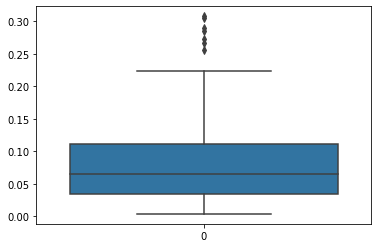

In [134]:
sns.boxplot(data = df["ölüm_oranı"]);
#sns.distplot(df["ölüm_oranı"], kde = False, bins="auto");

In [15]:
df["ölüm_oranı"].quantile([0,0.25,0.5,0.75,1]) 

0.00    0.003429
0.25    0.037344
0.50    0.075123
0.75    0.145979
1.00    0.973506
Name: ölüm_oranı, dtype: float64

In [16]:
Q1 = df["ölüm_oranı"].quantile(0.25)
Q3 = df["ölüm_oranı"].quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [17]:
ust_sinir

0.3089299389842765

In [18]:
df = df[(df.ölüm_oranı >= alt_sinir) & (df.ölüm_oranı <= ust_sinir)]
dff =  df.drop("Country",axis=1).drop("Unit (all except Population)",axis=1).drop("Undernourished",axis=1)

In [19]:
df["ölüm_oranı"].describe().T

count    122.000000
mean       0.086330
std        0.071209
min        0.003429
25%        0.033384
50%        0.065293
75%        0.111111
max        0.307692
Name: ölüm_oranı, dtype: float64

In [135]:
dff

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Vegetables,Vegetal Products,Obesity,Confirmed,Deaths,Recovered,Active,Population,iyilesme_orani,ölüm_oranı
0,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,...,6.7642,40.5645,4.5,0.012321,0.000321,0.001467,0.010533,38042000.0,0.820588,0.179412
1,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,...,11.7753,31.2304,22.3,0.030511,0.001085,0.022883,0.006543,2858000.0,0.954745,0.045255
2,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,...,11.6484,40.3651,26.6,0.013572,0.001168,0.006545,0.005859,43406000.0,0.848566,0.151434
3,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,...,2.3041,45.0722,6.8,0.000143,0.000006,0.000041,0.000095,31427000.0,0.866667,0.133333
5,4.2672,0.2234,19.3454,0.0,8.4102,0.9979,0.4693,6.0435,7.0421,10.2328,...,4.3503,30.6559,28.5,0.013970,0.000699,0.004088,0.009184,44939000.0,0.854021,0.145979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,3.5664,0.2100,17.8865,0.0,10.2510,0.7764,0.6058,5.3746,3.7863,12.3906,...,3.9333,32.1076,28.9,0.020205,0.000540,0.014862,0.004803,3519000.0,0.964945,0.035055
163,0.6835,0.1353,14.4463,0.0,10.5365,0.3566,0.1218,5.2150,1.8621,11.7952,...,14.8354,35.5540,15.3,0.007427,0.000030,0.005939,0.001458,33471000.0,0.994995,0.005005
165,2.5952,0.0403,14.7565,0.0,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,...,4.1474,35.2416,25.2,0.001480,0.000035,0.000719,0.000726,28516000.0,0.953488,0.046512
168,5.7360,0.0829,6.0197,0.0,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,...,3.4649,43.9789,6.5,0.001495,0.000039,0.000655,0.000801,17861000.0,0.943548,0.056452


In [137]:
corr = df.corr(method="spearman")
corr.style.background_gradient(cmap='coolwarm')

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Confirmed,Deaths,Recovered,Active,Population,iyilesme_orani,ölüm_oranı
Alcoholic Beverages,1,0.398895,0.362229,0.31631,-0.519859,0.184651,0.050294,-0.250849,0.419205,0.262837,-0.0853689,-0.00599764,-0.120864,-0.38788,-0.146815,0.177007,0.0574847,0.13201,-0.150139,-0.136751,-0.131144,-0.285992,-0.362203,0.164385,0.282896,0.346434,0.280867,0.165813,-0.159665,-0.0754873,0.0776286
Animal fats,0.398895,1,0.725662,0.234028,-0.559697,0.410347,-0.171189,-0.146703,0.535313,0.664611,-0.158766,0.11843,-0.491034,-0.449587,-0.148425,-0.112597,0.423157,0.325006,-0.168093,0.134016,-0.115515,0.153206,-0.725814,0.501516,0.523209,0.56431,0.593737,0.342651,-0.0968611,0.0920398,-0.0920696
Animal Products,0.362229,0.725662,1,0.404094,-0.675079,0.563832,-0.0876773,-0.19149,0.623179,0.894733,-0.0899306,0.0586677,-0.498895,-0.503364,-0.169441,-0.301199,0.574182,0.369231,-0.0403984,0.151278,-0.0903539,0.158023,-0.999993,0.520335,0.596538,0.596162,0.643402,0.412694,-0.155584,0.141289,-0.139643
"Aquatic Products, Other",0.31631,0.234028,0.404094,1,-0.26811,0.508347,0.383586,-0.0800803,0.474816,0.169649,-0.0492704,-0.0147132,-0.0264673,-0.265381,0.214695,-0.283557,0.285555,0.318786,0.0277215,0.136007,-0.0258962,0.0612514,-0.403564,0.217816,0.452205,0.396,0.456539,0.249994,0.00437907,0.191982,-0.191886
Cereals - Excluding Beer,-0.519859,-0.559697,-0.675079,-0.26811,1,-0.33927,-0.00509879,-0.0309,-0.476196,-0.58416,0.0568277,0.0188785,0.299616,0.462395,0.214927,-0.100968,-0.282162,-0.169357,0.0795767,-0.0739782,0.185437,-0.132922,0.675092,-0.477998,-0.60819,-0.601574,-0.611693,-0.441,0.245426,-0.112474,0.111278
Eggs,0.184651,0.410347,0.563832,0.508347,-0.33927,1,0.0948548,0.0609113,0.622889,0.324225,-0.093729,-0.0417191,-0.274238,-0.325243,-0.0268804,-0.311559,0.425554,0.468339,0.0630771,0.190952,0.0781309,0.178858,-0.5636,0.477548,0.502355,0.491348,0.519595,0.366547,0.0374198,0.151487,-0.150221
"Fish, Seafood",0.050294,-0.171189,-0.0876773,0.383586,-0.00509879,0.0948548,1,0.0192617,0.179218,-0.384934,0.129883,-0.0731314,0.360898,-0.110135,0.199152,-0.115739,-0.00805961,0.134118,0.173878,0.0116782,0.110749,-0.0963152,0.0882589,-0.0872831,0.0530399,0.0528417,0.0660529,-0.0498415,-0.0739572,0.0784579,-0.0792509
Fruits - Excluding Wine,-0.250849,-0.146703,-0.19149,-0.0800803,-0.0309,0.0609113,0.0192617,1,0.0411373,-0.204074,0.0549964,-0.00613311,0.203324,0.182817,-0.0701246,-0.0599264,-0.0751008,-0.0198499,0.116283,0.0846485,-0.0235906,0.0521808,0.191589,0.174289,0.0823043,0.0994016,0.0111724,0.139281,-0.0071079,-0.106751,0.105026
Meat,0.419205,0.535313,0.623179,0.474816,-0.476196,0.622889,0.179218,0.0411373,1,0.317483,0.077217,0.128293,-0.186772,-0.337324,-0.142136,-0.232631,0.358198,0.538413,0.0533322,0.0794142,0.193004,0.0414743,-0.623278,0.580655,0.530469,0.536212,0.544328,0.353068,-0.144997,0.108416,-0.106718
Milk - Excluding Butter,0.262837,0.664611,0.894733,0.169649,-0.58416,0.324225,-0.384934,-0.204074,0.317483,1,-0.154589,0.0287655,-0.55604,-0.355033,-0.194677,-0.231084,0.50949,0.206757,-0.175653,0.107014,-0.146299,0.18393,-0.894852,0.462936,0.477974,0.480644,0.533767,0.3555,-0.13396,0.101516,-0.0994809


In [22]:
shapiro(dff["ölüm_oranı"]) #H0 Hipotezi: Dağılımımız ve teorik normal dağılım arasında istatistiki olarak anlamlı bir fark yoktur.
                            #H1 Hipotez: Dağılımımız ve teorik normal dağılım arasında istatistiki olarak anlamlı bir fark vardır.

(0.8577079772949219, 1.8248751398886043e-09)

In [23]:
for x in dff.columns:
    if(shapiro(dff[x])[1]>0.05):
        print(x)

Animal Products
Vegetal Products


In [24]:
for x in dff.columns[-8:]:
  for y in dff.columns[0:23] :
    if ((stats.spearmanr(dff[x],dff[y])[1]<0.05) & (stats.spearmanr(dff[x],dff[y])[0]!=1) & (stats.spearmanr(dff[x],dff[y])[0]!=-1) & (stats.spearmanr(dff[x],dff[y])[0]!=0) & (x!=y)):
        print(stats.spearmanr(dff[x],dff[y]),x,"<->",y)

SpearmanrResult(correlation=0.501516031103102, pvalue=3.999508851125683e-09) Obesity <-> Animal fats
SpearmanrResult(correlation=0.5203345004136694, pvalue=8.10407014098516e-10) Obesity <-> Animal Products
SpearmanrResult(correlation=0.21781623730541164, pvalue=0.015947977026497195) Obesity <-> Aquatic Products, Other
SpearmanrResult(correlation=-0.4779982924748459, pvalue=2.579134130998607e-08) Obesity <-> Cereals - Excluding Beer
SpearmanrResult(correlation=0.47754799318196245, pvalue=2.6692284156249113e-08) Obesity <-> Eggs
SpearmanrResult(correlation=0.5806547567174197, pvalue=2.3730683209539918e-12) Obesity <-> Meat
SpearmanrResult(correlation=0.4629355779494257, pvalue=7.921636502394427e-08) Obesity <-> Milk - Excluding Butter
SpearmanrResult(correlation=-0.30438432186795067, pvalue=0.0006527799524573681) Obesity <-> Oilcrops
SpearmanrResult(correlation=-0.21734101603569564, pvalue=0.016185032376389394) Obesity <-> Pulses
SpearmanrResult(correlation=-0.18933151395137593, pvalue=0

In [25]:
df.nlargest(20,"Aquatic Products, Other")

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),iyilesme_orani,ölüm_oranı
82,"Korea, South",4.8669,0.2553,11.8174,1.6794,11.7286,0.6414,3.4396,3.6993,4.4239,...,4.9,<2.5,0.021093,0.000498,0.018651,0.001944,5.184600e+07,%,0.974013,0.025987
76,Japan,4.0440,0.0751,15.3194,0.1088,12.1692,1.6960,3.9283,2.8618,4.2599,...,4.4,<2.5,0.012559,0.000502,0.006572,0.005485,1.261800e+08,%,0.929084,0.070916
30,China,2.3224,0.0866,13.4240,0.0542,8.9298,1.2059,3.3435,4.2451,6.0732,...,6.6,8.5,0.006009,0.000332,0.005665,0.000013,1.398030e+09,%,0.944689,0.055311
149,Thailand,3.6223,0.0902,7.7828,0.0325,17.5571,1.1143,2.6297,8.3291,2.4675,...,10.8,7.8,0.004542,0.000084,0.004212,0.000246,6.637400e+07,%,0.980365,0.019635
94,Malaysia,0.8948,0.0882,12.6354,0.0204,17.3088,1.6596,5.3482,4.1713,4.9092,...,15.3,2.5,0.020536,0.000333,0.015611,0.004592,3.275300e+07,%,0.979127,0.020873
100,Mexico,4.4105,0.1672,15.1527,0.0201,11.4325,1.2967,0.9656,7.6794,4.3561,...,28.4,3.6,0.028700,0.002823,0.018250,0.007627,1.265770e+08,%,0.866044,0.133956
110,New Zealand,5.2220,0.7446,17.5777,0.0170,7.7522,0.7067,1.6771,4.0202,6.8421,...,32.0,<2.5,0.030103,0.000422,0.028112,0.001568,4.973000e+06,%,0.985201,0.014799
29,Chile,4.9690,0.1782,15.0394,0.0155,10.8579,0.7757,0.8711,3.9109,6.1492,...,28.8,2.7,0.157340,0.001690,0.071204,0.084445,1.910700e+07,%,0.976809,0.023191
21,Bulgaria,7.0834,0.2488,17.2483,0.0103,8.8750,0.5924,0.4845,3.9812,4.0073,...,27.4,3.6,0.028530,0.001333,0.006609,0.020588,6.975000e+06,%,0.832130,0.167870
99,Mauritius,3.0805,0.0074,9.2700,0.0102,17.1855,0.5910,2.1303,3.5680,4.6992,...,11.5,6.5,0.026224,0.000790,0.025434,0.000000,1.266000e+06,%,0.969880,0.030120


## •ÖLÜM ORANI HEDEF DEĞİŞKENİ İÇİN REGRESYON MODELLERİ•

## MULTIPLE LINEAR REGRESSION
## 𝑌 = 𝑎𝑋1 + b𝑋2 + 𝑐𝑋3 + … + K

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [27]:
X = dff.drop("ölüm_oranı", axis = 1).drop("iyilesme_orani",axis=1).drop("Deaths",axis=1).drop("Recovered",axis=1).drop("Active",axis=1).drop("Population",axis=1).drop("Confirmed",axis=1)
y = dff["ölüm_oranı"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [138]:
#lm = sm.OLS(y_train, X_train)
#model = lm.fit()
#model.summary()
ekli=sm.add_constant(X_train)
lm = sm.OLS(y_train, ekli)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Obesity   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     10.65
Date:                Tue, 26 May 2020   Prob (F-statistic):           3.21e-15
Time:                        22:09:43   Log-Likelihood:                -278.54
No. Observations:                  97   AIC:                             605.1
Df Residuals:                      73   BIC:                             666.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -3.389e+05   3.89e+05     -0.872      0.386   -1.11e+06    4.36e+05
Alcoholic Beverages       3388.2981   3889.167      0.871      0.386   -4362.800    1.11e+04
Animal fats               4044.8423   4023.372      1.005      0.318   -3973.726    1.21e+04
Animal Products           2734.3295   3870.450      0.706      0.482   -4979.466    1.04e+04
Aquatic Products, Other   3910.5357   4042.812      0.967      0.337   -4146.776     1.2e+04
Cereals - Excluding Beer  3387.9588   3889.186      0.871      0.387   -4363.177    1.11e+04
Eggs                      4049.7663   4023.282      1.007      0.317   -3968.623    1.21e+04
Fish, Seafood             4043.5851   4023.396      1.005      0.318   -3975.031    1.21e+04
Fruits - Excluding Wine   3388.7682   3889.224      0.871      0.386   -4362.445    1.11e+04
Meat                      4046.4448   4023.425      1.006      0.318   -3972.230    1.21e+04
Milk - Excluding Butter   4044.8262   4023.464      1.005      0.318   -3973.926    1.21e+04
Miscellaneous             3388.3433   3889.270      0.871      0.386   -4362.960    1.11e+04
Offals                    4036.9226   4022.819      1.004      0.319   -3980.544    1.21e+04
Oilcrops                  3388.0086   3889.040      0.871      0.387   -4362.838    1.11e+04
Pulses                    3386.3417   3889.340      0.871      0.387   -4365.102    1.11e+04
Spices                    3387.5918   3889.481      0.871      0.387   -4364.133    1.11e+04
Starchy Roots             3388.0804   3889.191      0.871      0.387   -4363.066    1.11e+04
Stimulants                3387.2438   3889.440      0.871      0.387   -4364.399    1.11e+04
Sugar & Sweeteners        3389.3282   3889.240      0.871      0.386   -4361.916    1.11e+04
Sugar Crops               3393.2925   3889.467      0.872      0.386   -4358.405    1.11e+04
Treenuts                  3392.6509   3889.372      0.872      0.386   -4358.857    1.11e+04
Vegetable Oils            3389.5960   3888.986      0.872      0.386   -4361.142    1.11e+04
Vegetables                3388.9718   3889.206      0.871      0.386   -4362.204    1.11e+04
Vegetal Products          3390.6921   3887.258      0.872      0.386   -4356.602    1.11e+04
==============================================================================
Omnibus:                        1.125   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                1.089
Skew:                          -0.114   Prob(JB):                        0.580
Kurtosis:                       2.534   Cond. No.                     3.40e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specif

## uyarı dikkate alınarak çoklu güçlü doğrusallıktan kurtulmak için principle component regression (PCR), partial less square (PLS) benzeri yöntemler denenmelidir.

## PLS(PARTIAL LEAST SQUARE)

In [29]:
X = dff.drop("ölüm_oranı", axis = 1).drop("iyilesme_orani",axis=1).drop("Deaths",axis=1).drop("Recovered",axis=1).drop("Active",axis=1).drop("Population",axis=1).drop("Confirmed",axis=1)
y = dff["ölüm_oranı"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [30]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [31]:
pls_model = PLSRegression().fit(X_train, y_train)

In [32]:
pls_model.coef_

array([[ 5.30389421e-03],
       [ 5.84483321e-03],
       [-3.92968574e-04],
       [-1.06084078e-02],
       [ 6.18105299e-03],
       [-1.53740645e-03],
       [-3.38491438e-03],
       [ 5.27804674e-03],
       [ 7.92135028e-03],
       [-2.50798262e-03],
       [-6.73176172e-03],
       [-1.07068796e-02],
       [-4.22246669e-03],
       [-1.02081747e-03],
       [-1.19225356e-02],
       [-1.47275462e-03],
       [-2.39123305e-03],
       [-3.17478290e-03],
       [ 1.49768426e-02],
       [ 8.48467975e-03],
       [ 3.34053533e-05],
       [-1.24124485e-02],
       [ 3.95149481e-04],
       [-2.94449873e-03]])

## Tahmin

In [33]:
pls_model.predict(X_train)[0:10]

array([[0.08407396],
       [0.01177172],
       [0.10829623],
       [0.17262823],
       [0.09398575],
       [0.09321951],
       [0.03637347],
       [0.09019267],
       [0.0931045 ],
       [0.11092691]])

In [34]:
y_pred = pls_model.predict(X_train)

In [35]:
np.sqrt(mean_squared_error(y_train, y_pred))

0.0648042759069291

In [36]:
r2_score(y_train, y_pred)

0.21290671308043796

In [37]:
y_pred = pls_model.predict(X_test)

In [38]:
r2_score(y_test, y_pred,multioutput='variance_weighted'),np.sqrt(mean_squared_error(y_test, y_pred))

(-129.39300460012575, 0.7076276669706549)

## Model Tuning

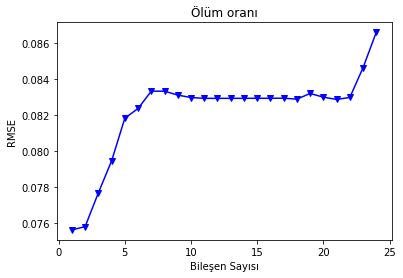

In [39]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "b")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Ölüm oranı');

In [40]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [41]:
y_pred = pls_model.predict(X_test)

In [42]:
r2_score(y_test, y_pred,multioutput='variance_weighted'),np.sqrt(mean_squared_error(y_test, y_pred))

(-129.39300460012575, 0.7076276669706549)

## LASSO

In [43]:
from sklearn.linear_model import Lasso
X = dff.drop("ölüm_oranı", axis = 1).drop("iyilesme_orani",axis=1).drop("Deaths",axis=1).drop("Recovered",axis=1).drop("Active",axis=1).drop("Population",axis=1).drop("Confirmed",axis=1)
y = dff["ölüm_oranı"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [44]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

In [45]:
lasso_model

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
lasso_model.coef_

array([ 0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0., -0., -0., -0.,
       -0., -0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0., -0.])

## Tahmin 

In [47]:
lasso_model.predict(X_test)

array([0.08635731, 0.08635731, 0.08635731, 0.08635731, 0.08635731,
       0.08635731, 0.08635731, 0.08635731, 0.08635731, 0.08635731,
       0.08635731, 0.08635731, 0.08635731, 0.08635731, 0.08635731,
       0.08635731, 0.08635731, 0.08635731, 0.08635731, 0.08635731,
       0.08635731, 0.08635731, 0.08635731, 0.08635731, 0.08635731])

In [48]:
y_pred = lasso_model.predict(X_test)

In [49]:
r2_score(y_test, y_pred,multioutput='variance_weighted'),np.sqrt(mean_squared_error(y_test, y_pred))

(-4.617671071516227e-06, 0.061969595457154095)

## Model Tuning

In [50]:
from sklearn.linear_model import LassoCV

In [51]:
lasso_cv_model = LassoCV(alphas = [0.01,0.1,0.5,1], 
                         cv = 10, 
                         max_iter = 20000, 
                         normalize = True)

In [52]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=[0.01, 0.1, 0.5, 1], copy_X=True, cv=10, eps=0.001,
        fit_intercept=True, max_iter=20000, n_alphas=100, n_jobs=None,
        normalize=True, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [53]:
lasso_cv_model.alpha_

1.0

In [54]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [55]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
y_pred = lasso_tuned.predict(X_test)

In [57]:
r2_score(y_test, y_pred,multioutput='variance_weighted'),np.sqrt(mean_squared_error(y_test, y_pred))

(-4.617671071516227e-06, 0.061969595457154095)

## BAGGING TREES

In [58]:
X = dff.drop("ölüm_oranı", axis = 1).drop("iyilesme_orani",axis=1).drop("Deaths",axis=1).drop("Recovered",axis=1).drop("Active",axis=1).drop("Population",axis=1).drop("Confirmed",axis=1)
y = dff["ölüm_oranı"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [59]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [60]:
bag_model.estimators_[1]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1042062, splitter='best')

## Tahmin

In [61]:
y_pred = bag_model.predict(X_test)

In [62]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.08049116689244655

In [63]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [64]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

0.09180792320520924

In [65]:
yedi_y_pred = bag_model.estimators_[4].fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

0.08621656296328614

In [66]:
np.sqrt(mean_squared_error(y_test, y_pred)),r2_score(y_test, y_pred,multioutput='variance_weighted')

(0.08049116689244655, -0.6871011842290694)

# Model Tuning

In [67]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [68]:
bag_params = {"n_estimators": range(2,40)}

In [69]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [70]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=True,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None, param_grid={'n_estimators': range(2, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [71]:
bag_cv_model.best_params_

{'n_estimators': 16}

In [139]:
bag_tuned = BaggingRegressor( n_estimators = 16, random_state = 45)

In [140]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=16,
                 n_jobs=None, oob_score=False, random_state=45, verbose=0,
                 warm_start=False)

In [141]:
y_pred = bag_tuned.predict(X_test)

In [142]:
np.sqrt(mean_squared_error(y_test, y_pred)),r2_score(y_test, y_pred,multioutput='variance_weighted')

(7.434716601021185, 0.38016755760857834)

## YAPAY SİNİR AĞI

In [76]:
X = dff.drop("ölüm_oranı", axis = 1).drop("iyilesme_orani",axis=1)
y = dff["ölüm_oranı"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [79]:
X_train_scaled = scaler.transform(X_train)

In [80]:
X_test_scaled = scaler.transform(X_test)

In [81]:
from sklearn.neural_network import MLPRegressor

In [82]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [83]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

## Tahmin

In [84]:
y_pred = mlp_model.predict(X_test_scaled)

In [85]:
r2_score(y_test, y_pred,multioutput='variance_weighted'),np.sqrt(mean_squared_error(y_test, y_pred))

(-632.4587870557208, 1.5596848037124522)

## Model Tuning

In [86]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [87]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [88]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [89]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100, 20),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=200,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['relu', 'logistic'],
             

In [90]:
mlp_cv_model.best_params_

{'activation': 'logistic',
 'alpha': 0.01,
 'hidden_layer_sizes': (300, 200, 150)}

In [91]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [92]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(activation='relu', alpha=0.02, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 50, 150), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [93]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [94]:
r2_score(y_test, y_pred,multioutput='variance_weighted'),np.sqrt(mean_squared_error(y_test, y_pred))

(-11.132665048570308, 0.21585184360414936)

## •OBEZİTE HEDEF DEĞİŞKENİ İÇİN REGRESYON MODELLERİ•

## MULTIPLE LINEAR REGRESSION
## 𝑌 = 𝑎𝑋1 + b𝑋2 + 𝑐𝑋3 + … + K

In [95]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [96]:
X = dff.drop("Obesity",axis=1).drop("ölüm_oranı", axis = 1).drop("iyilesme_orani",axis=1).drop("Deaths",axis=1).drop("Recovered",axis=1).drop("Active",axis=1).drop("Population",axis=1).drop("Confirmed",axis=1)
y = dff["Obesity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [97]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()
#ekli=sm.add_constant(X_train)
#lm = sm.OLS(y_train, ekli)
#model = lm.fit()
#model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Obesity   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              81.12
Date:                Tue, 26 May 2020   Prob (F-statistic):                    2.40e-43
Time:                        21:41:04   Log-Likelihood:                         -279.04
No. Observations:                  97   AIC:                                      604.1
Df Residuals:                      74   BIC:                                      663.3
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Alcoholic Beverages         -1.9377     64.433     -0.030      0.976    -130.323     126.447
Animal fats                587.7722    680.062      0.864      0.390    -767.281    1942.826
Animal Products           -587.3826    680.088     -0.864      0.391   -1942.487     767.721
Aquatic Products, Other    441.1890    712.231      0.619      0.538    -977.963    1860.341
Cereals - Excluding Beer    -2.2930     64.461     -0.036      0.972    -130.735     126.149
Eggs                       592.7796    680.089      0.872      0.386    -762.328    1947.887
Fish, Seafood              586.4747    679.934      0.863      0.391    -768.324    1941.273
Fruits - Excluding Wine     -1.5170     64.478     -0.024      0.981    -129.992     126.958
Meat                       589.3261    680.054      0.867      0.389    -765.711    1944.363
Milk - Excluding Butter    587.6860    680.138      0.864      0.390    -767.518    1942.890
Miscellaneous               -1.9891     63.962     -0.031      0.975    -129.436     125.458
Offals                     580.3117    679.863      0.854      0.396    -774.346    1934.969
Oilcrops                    -2.1187     64.320     -0.033      0.974    -130.278     126.041
Pulses                      -4.0444     64.487     -0.063      0.950    -132.537     124.448
Spices                      -2.9055     65.313     -0.044      0.965    -133.044     127.233
Starchy Roots               -2.1760     64.468     -0.034      0.973    -130.631     126.279
Stimulants                  -3.2346     64.123     -0.050      0.960    -131.002     124.533
Sugar & Sweeteners          -0.9711     64.444     -0.015      0.988    -129.380     127.437
Sugar Crops                  2.7965     64.563      0.043      0.966    -125.848     131.441
Treenuts                     2.2360     64.431      0.035      0.972    -126.145     130.617
Vegetable Oils              -0.4819     64.446     -0.007      0.994    -128.893     127.929
Vegetables                  -1.2977     64.453     -0.020      0.984    -129.723     127.127
Vegetal Products             2.1210     64.465      0.033      0.974    -126.327     130.569
==============================================================================
Omnibus:                        0.847   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.901
Skew:                          -0.097   Prob(JB):                        0.637
Kurtosis:                       2.570   Cond. No.                     1.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

## LASSO

In [98]:
from sklearn.linear_model import Lasso
X = dff.drop("Obesity",axis=1).drop("ölüm_oranı", axis = 1).drop("iyilesme_orani",axis=1).drop("Deaths",axis=1).drop("Recovered",axis=1).drop("Active",axis=1).drop("Population",axis=1).drop("Confirmed",axis=1)
y = dff["Obesity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [99]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

In [100]:
lasso_model

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [101]:
lasso_model.coef_

array([-0.16490133,  0.        ,  0.        , -0.        , -0.49519501,
        2.76363581, -1.11497023,  0.29437117,  1.76582395, -0.        ,
       -0.        , -0.        , -0.3359506 , -1.88251264, -0.        ,
       -0.35959284, -0.        ,  0.7321181 ,  2.25756409,  0.        ,
        1.4228659 ,  0.58124247, -0.        ])

## Tahmin 

In [102]:
lasso_model.predict(X_test)

array([23.7333516 , 25.24516304, 25.53890255, 17.78183654, 31.18086434,
       -2.01858315, 23.97394504, 24.69452092, 29.29117979,  5.21408338,
       22.69230849, 22.04963402, 25.27473474, 21.32115843,  2.17894279,
       26.52672411, 13.86838885, 22.68044652,  6.40775769, 11.41217821,
        9.69504692, 17.11073742, 24.87529701, 10.32785817, 31.25438299])

In [103]:
y_pred = lasso_model.predict(X_test)

In [104]:
r2_score(y_test, y_pred,multioutput='variance_weighted'),np.sqrt(mean_squared_error(y_test, y_pred))

(0.20085648958909186, 8.44188934618792)

## Model Tuning

In [105]:
from sklearn.linear_model import LassoCV

In [106]:
lasso_cv_model = LassoCV(alphas = [0.01,0.1,0.5,1], 
                         cv = 10, 
                         max_iter = 20000, 
                         normalize = True)

In [107]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=[0.01, 0.1, 0.5, 1], copy_X=True, cv=10, eps=0.001,
        fit_intercept=True, max_iter=20000, n_alphas=100, n_jobs=None,
        normalize=True, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [108]:
lasso_cv_model.alpha_

0.1

In [109]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [110]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
y_pred = lasso_tuned.predict(X_test)

In [112]:
r2_score(y_test, y_pred,multioutput='variance_weighted'),np.sqrt(mean_squared_error(y_test, y_pred))

(0.20085648958909186, 8.44188934618792)

## BAGGING TREES

In [113]:
X = dff.drop("Obesity",axis=1).drop("ölüm_oranı", axis = 1).drop("iyilesme_orani",axis=1).drop("Deaths",axis=1).drop("Recovered",axis=1).drop("Active",axis=1).drop("Population",axis=1).drop("Confirmed",axis=1)
y = dff["Obesity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [114]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [115]:
bag_model.estimators_[1]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1522645880, splitter='best')

## Tahmin

In [116]:
y_pred = bag_model.predict(X_test)

In [117]:
np.sqrt(mean_squared_error(y_test, y_pred))

7.443944384531631

In [118]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [119]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

7.13394701410096

In [120]:
yedi_y_pred = bag_model.estimators_[4].fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

7.1965269401288285

In [121]:
np.sqrt(mean_squared_error(y_test, y_pred)),r2_score(y_test, y_pred,multioutput='variance_weighted')

(7.443944384531631, 0.378627961828511)

# Model Tuning

In [122]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [123]:
bag_params = {"n_estimators": range(2,40)}

In [124]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [125]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=True,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None, param_grid={'n_estimators': range(2, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [126]:
bag_cv_model.best_params_

{'n_estimators': 32}

In [127]:
bag_tuned = BaggingRegressor( n_estimators = 14, random_state = 45)

In [128]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=14,
                 n_jobs=None, oob_score=False, random_state=45, verbose=0,
                 warm_start=False)

In [129]:
y_pred = bag_tuned.predict(X_test)

In [130]:
np.sqrt(mean_squared_error(y_test, y_pred)),r2_score(y_test, y_pred,multioutput='variance_weighted')

(7.351329325852764, 0.39399358140624985)